# FRC Stat Sheet
Visualization of score from the Hudson Valley 2018 regional, and New York City Regional.

In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
from urllib.request import Request, urlopen
import json

def get_json(url):
    hdr = { 
        'X-TBA-Auth-Key' : '9l2oKd2IBt1TrlCxGhAl6pa6z06rNGcbDQrQ0EXFcMa7eCtPBdltgM5Tc69nwTOo', 
        'User-Agent': 'Mozilla /5.0 (Compatible MSIE 9.0;Windows NT 6.1;WOW64; Trident/5.0)' 
    }
    req = Request(url=url, headers=hdr)
    response = urlopen(req)
    json_text = json.loads(response.read())
    response.close()
    return json_text

Populating the interactive namespace from numpy and matplotlib


# Hudson Valley 2018

In [2]:
json_data = get_json('https://www.thebluealliance.com/api/v3/event/2018nysu/matches')

In [3]:
nysu_2018 = pd.io.json.json_normalize(data=json_data, meta=[['score_breakdown', 'blue'], ['alliances', 'red']], sep='.')

In [4]:
nysu_2018['actual_time'] = pd.to_datetime(nysu_2018['actual_time'], unit='s')
nysu_2018.drop('alliances.blue.dq_team_keys', axis=1, inplace=True)
nysu_2018.drop('alliances.blue.surrogate_team_keys', axis=1, inplace=True)
nysu_2018.drop('alliances.red.dq_team_keys', axis=1, inplace=True)
nysu_2018.drop('alliances.red.surrogate_team_keys', axis=1, inplace=True)
nysu_2018.drop('time', axis=1, inplace=True)
nysu_2018.drop('videos', axis=1, inplace=True)
nysu_2018.drop('post_result_time', axis=1, inplace=True)
nysu_2018.drop('predicted_time', axis=1, inplace=True)
# list(df)

### Auto Scores of Alliances Qualification Matches
Most teams only decided to cross the auton line, some decided to get ownership points

Text(0,0.5,'Number of Teams')

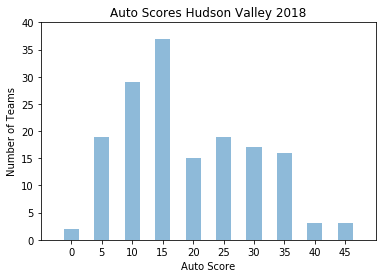

In [5]:
nysu_2018_qm = nysu_2018[nysu_2018['comp_level'] == 'qm']
auto_scores = [nysu_2018_qm['score_breakdown.blue.autoPoints'], nysu_2018_qm['score_breakdown.red.autoPoints']]
nysu_auto_scores = pd.concat(auto_scores)
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
nysu_auto_hist = hist(nysu_auto_scores, rwidth=.5, alpha=0.5, align='left', bins=bins)
title('Auto Scores Hudson Valley 2018')
xlim([-5, 50])
ylim([0, 40])
xlabel('Auto Score')
xticks(range(0, 50, 5))
ylabel('Number of Teams')

### Kernel Density Estimation of Auto Scores
The peak at 15 points shows that most alliances only crossed the auton line

Text(0.5,1,'Kernel Density Estimation of Auto Scores')

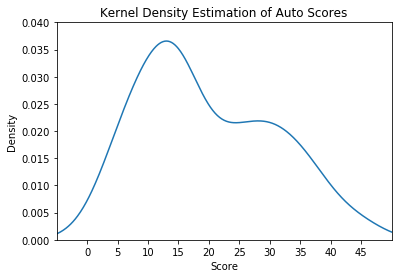

In [6]:
nysu_auto_scores.plot(kind='kde')
xlim([-5, 50])
xticks(range(0, 50, 5))
ylim([0, 0.04])
xlabel('Score')
title('Kernel Density Estimation of Auto Scores')

### Scatter Plot of Overall Score vs Auto Score
There is somewhat of a correlation of between the overall score and auto score of alliances

Text(0.5,1,'Overall Score v. Auto Score')

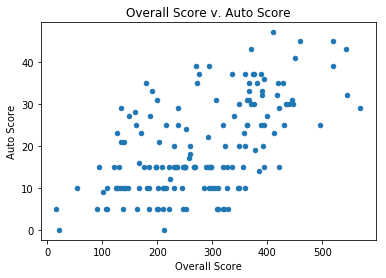

In [7]:
nysu_2018_qm.plot(x=['alliances.blue.score', 'alliances.red.score'], 
                  y=['score_breakdown.blue.autoPoints', 'score_breakdown.red.autoPoints'], 
                  kind='scatter')
xlabel('Overall Score')
ylabel('Auto Score')
title('Overall Score v. Auto Score')

# New York City 2018

In [8]:
nyny_2018 = pd.io.json.json_normalize(data=get_json('https://www.thebluealliance.com/api/v3/event/2018nyny/matches'), 
                                      meta=[['score_breakdown', 'blue'], ['alliances', 'red']], sep='.')

In [9]:
nyny_2018['actual_time'] = pd.to_datetime(nyny_2018['actual_time'], unit='s')
nyny_2018.drop('alliances.blue.dq_team_keys', axis=1, inplace=True)
nyny_2018.drop('alliances.blue.surrogate_team_keys', axis=1, inplace=True)
nyny_2018.drop('alliances.red.dq_team_keys', axis=1, inplace=True)
nyny_2018.drop('alliances.red.surrogate_team_keys', axis=1, inplace=True)
nyny_2018.drop('time', axis=1, inplace=True)
nyny_2018.drop('videos', axis=1, inplace=True)
nyny_2018.drop('post_result_time', axis=1, inplace=True)
nyny_2018.drop('predicted_time', axis=1, inplace=True)

In [10]:
nyny_2018_qm = nyny_2018[nyny_2018['comp_level'] == 'qm']
nyny_auto_scores = pd.concat([nyny_2018_qm['score_breakdown.blue.autoPoints'], 
                              nyny_2018_qm['score_breakdown.red.autoPoints']])

### Auto Scores of Alliances Qualification Matches

Text(0,0.5,'Number of Teams')

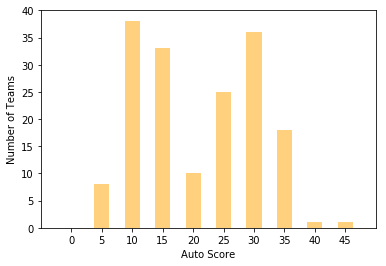

In [11]:
nyny_auto_hist = hist(nyny_auto_scores, rwidth=.5, alpha=0.5, align='left', bins=bins, color='orange')
xlabel('Auto Score')
xlim([-5, 50])
ylim([0, 40])
xlabel('Auto Score')
xticks(range(0, 50, 5))
ylabel('Number of Teams')

### Kernel Density Estimation of Auto Scores

Text(0.5,1,'Kernel Density Estimation of Auto Scores')

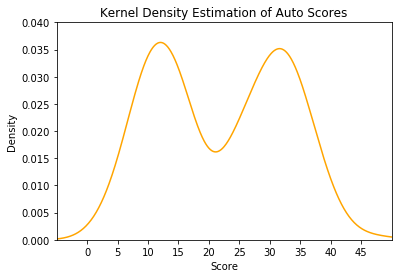

In [12]:
nyny_auto_scores.plot(kind='kde', color='orange')
xlim([-5, 50])
xticks(range(0, 50, 5))
ylim([0, 0.04])
xlabel('Score')
title('Kernel Density Estimation of Auto Scores')

### Scatter Plot of Overall Score vs Auto Score

Text(0.5,1,'Overall Score v. Auto Score')

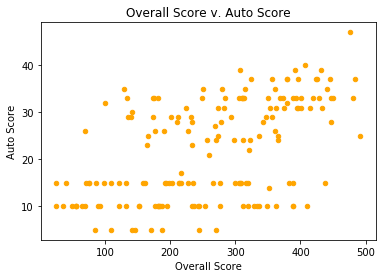

In [13]:
nyny_2018_qm.plot(x=['alliances.blue.score', 'alliances.red.score'], 
                  y=['score_breakdown.blue.autoPoints', 'score_breakdown.red.autoPoints'], 
                  kind='scatter', color='orange')
xlabel('Overall Score')
ylabel('Auto Score')
title('Overall Score v. Auto Score')

# Hudson Valley vs New York City
The scores are more distributed to the right in New York City

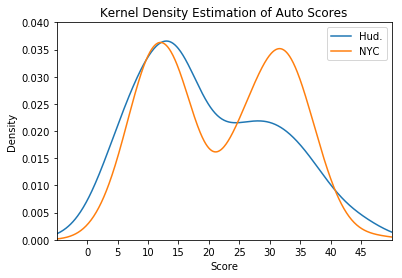

In [14]:
subplot(nysu_auto_scores.plot(kind='kde'), nyny_auto_scores.plot(kind='kde'))
xlim([-5, 50])
xticks(range(0, 50, 5))
ylim([0, 0.04])
xlabel('Score')
title('Kernel Density Estimation of Auto Scores')
legend(['Hud.', 'NYC'])